According to WHO, 15 million people suffer strokes worldwide each year. On which 5 million die and another 5 million are permanently disabled.
<br>
The goal of this project is to create a machine learning model for predicting stroke and to assess the model's accuracy. We'll experiment with various machine learning algorithms to find which ones generate dependable and accurate results.

**Importing Libraries and Datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
t0 = time()

df_stroke = pd.read_csv("C:/Users/SOUBHIK MANDAL/Desktop/Data Analysis of Prediction of Medical Condition/dataset/healthcare-dataset-stroke-data.csv")
df_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**What is in this dataset**

In [2]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Checking for missing values**

In [4]:
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
print ("Unique values are:\n",df_stroke.nunique())

Unique values are:
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


**Checking for outliers**

In [6]:
bmi_outliers=df_stroke[df_stroke['bmi']>50]
bmi_outliers['bmi'].shape

(79,)

In [7]:
df_stroke["bmi"] = df_stroke["bmi"].apply(lambda x: df_stroke.bmi.mean() if x>50 else x)

In [8]:
df_stroke.bmi.replace(to_replace=np.nan,value=df_stroke.bmi.mean(), inplace=True)
print (df_stroke.shape)

(5110, 12)


In [9]:
df_stroke.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df_stroke.drop(columns='id',inplace=True)
df_stroke.head().iloc[:5]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.451796,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [11]:
df_stroke.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
df_stroke['gender']=df_stroke['gender'].replace('Other','Male')

df_stroke.replace({ 'gender': {'Male':1 ,'Female':0}} ,inplace=True)
df_stroke.replace({ 'ever_married': {'No':0 ,'Yes':1}} ,inplace=True)
df_stroke.replace({ 'Residence_type': {'Rural':0 ,'Urban':1}} ,inplace=True)
df_stroke.replace({ 'smoking_status': {'Unknown':0 ,'never smoked':1,'formerly smoked':2,'smokes':3}} ,inplace=True)
df_stroke.replace({ 'work_type': {'Private':0 ,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4}} ,inplace=True)

In [13]:
df_stroke.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

**Data Exploration for the Dataset**

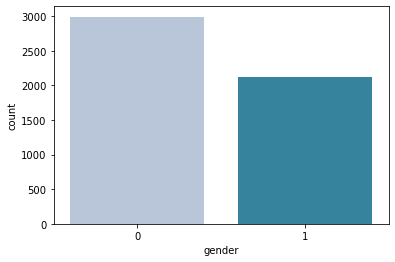

In [14]:
p = sns.countplot(data=df_stroke, x = 'gender', palette='PuBuGn')

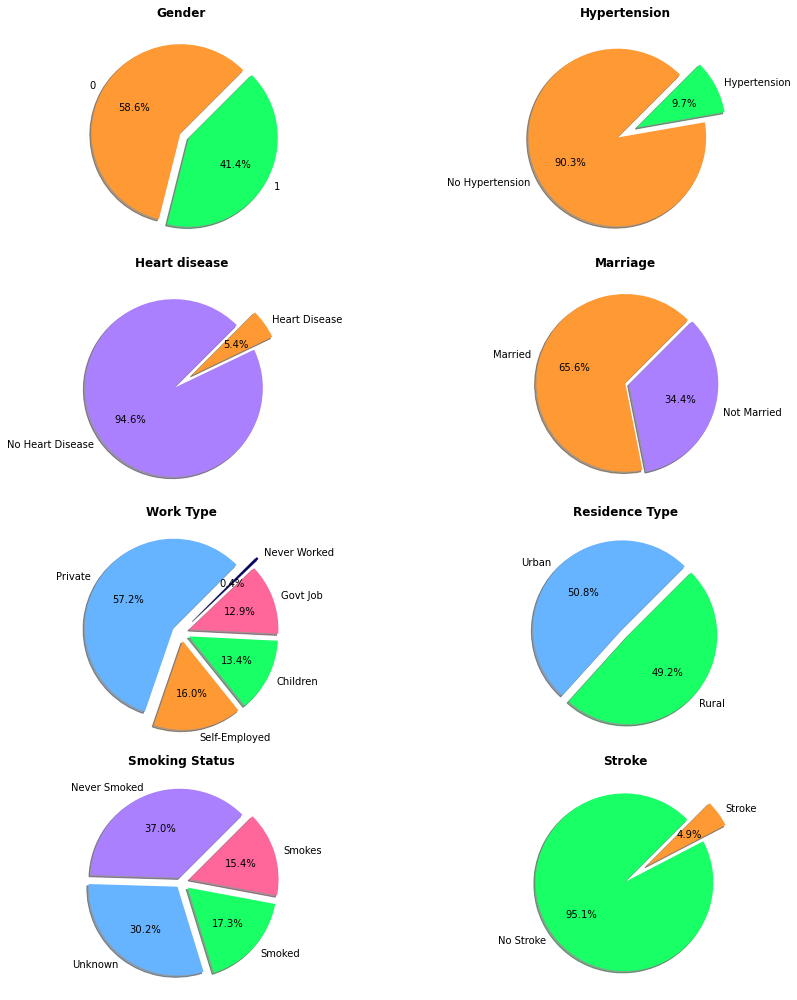

In [15]:
fig, ax = plt.subplots(4,2, figsize = (14,14))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df_stroke['gender'].value_counts().index.tolist()[:2]
values = df_stroke['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True, startangle=45,explode=[0.01, 0.1])
ax1.set_title("Gender", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Hypertension", "Hypertension"]
values = df_stroke['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#FF9933','#19FF66'],shadow=True,startangle=45,explode=[0.1, 0.15])
ax2.set_title("Hypertension", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Heart Disease", "Heart Disease"]
values = df_stroke['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%",colors=['#AA80FF','#FF9933'],shadow=True, startangle=45,explode=[0.1, 0.15])
ax3.set_title("Heart disease", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Married", "Not Married"]
values = df_stroke['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#FF9933','#AA80FF'],shadow=True,startangle=45,explode=[0, 0.05])
ax4.set_title("Marriage", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Private", "Self-Employed", "Children", "Govt Job", "Never Worked"]
values = df_stroke['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#FF9933','#19FF66','#FF6699','#000066'],shadow=True, startangle=45,explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Urban", "Rural"]
values = df_stroke['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", colors=['#66b3ff','#19FF66'],shadow=True,startangle=45,explode=[0.05, 0.05])
ax6.set_title("Residence Type", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["Never Smoked", "Unknown", "Smoked", "Smokes"]
values = df_stroke['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.05, 0.07, 0.1, 0.1],colors=['#AA80FF','#66b3ff','#19FF66','#FF6699'])
ax7.set_title("Smoking Status", fontdict={'fontsize': 12},fontweight ='bold')

labels = ["No Stroke", "Stroke"]
values = df_stroke['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45,explode=[0.01, 0.3],colors=['#19FF66','#FF9933'])
ax8.set_title("Stroke", fontdict={'fontsize': 12},fontweight ='bold')

plt.tight_layout()
plt.show()

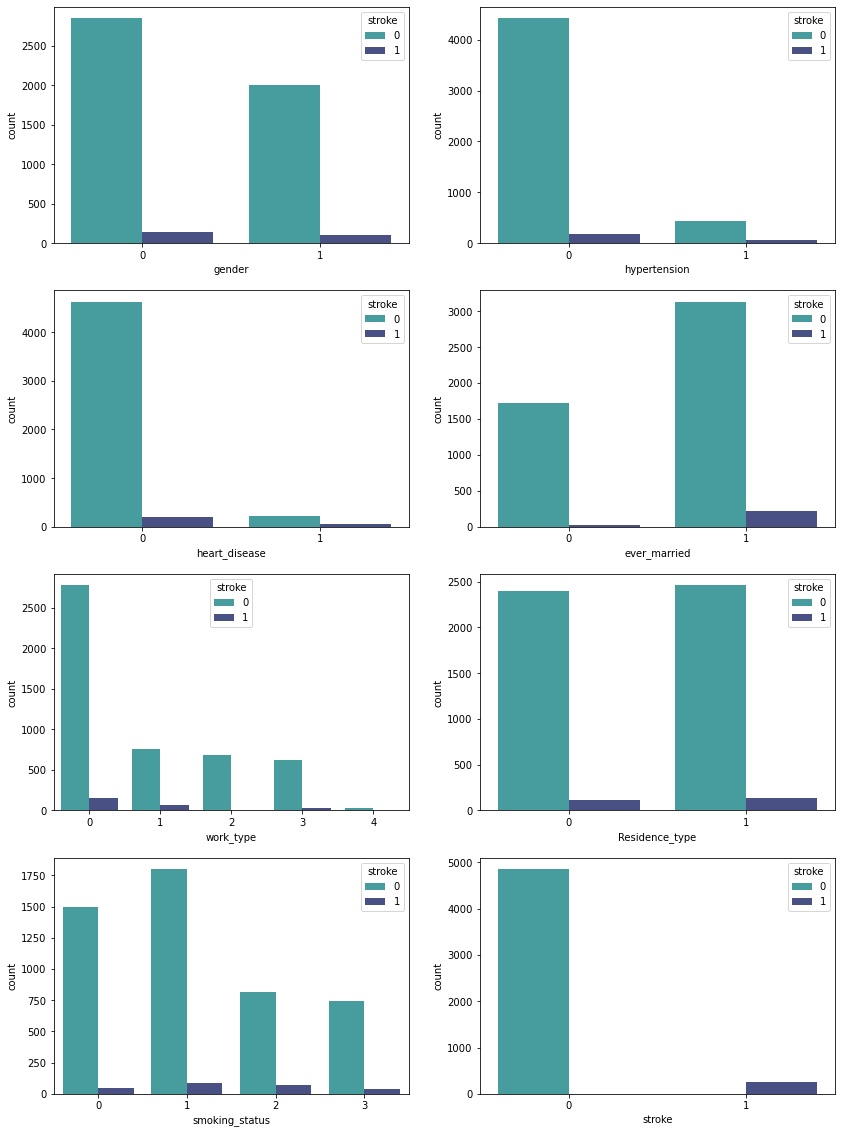

In [16]:
df_st=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']
fig, axs = plt.subplots(4, 2, figsize=(14,20))
axs = axs.flatten()

for i, col_name in enumerate(df_st):
    sns.countplot(x=col_name, data=df_stroke, ax=axs[i], hue =df_stroke['stroke'],palette='mako_r')

<AxesSubplot:title={'center':'Correlation map for variables'}>

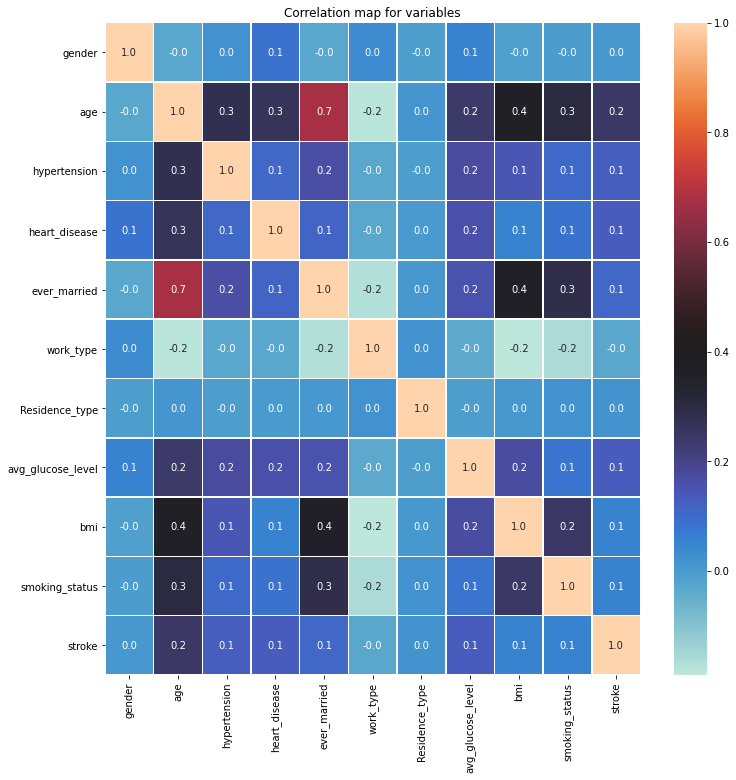

In [17]:
f,ax = plt.subplots(figsize=(12, 12))
ax.set_title('Correlation map for variables')
sns.heatmap(df_stroke.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="icefire")

**Dataset split for prediction**

In [18]:
X = df_stroke.drop(['stroke'], axis=1)
y = df_stroke['stroke']

from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split
 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (4088, 10)
y_train: (4088,)
X_test: (1022, 10)
y_test: (1022,)


Random Forest Classifier Accuracy: 93.9334637964775 %
Training time 6.547


<AxesSubplot:>

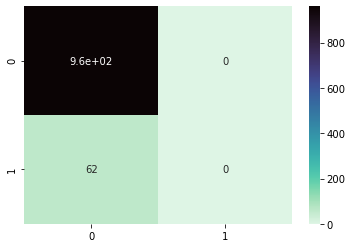

In [19]:
import warnings
warnings.filterwarnings('ignore')
t0 = time()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc_rf = round(clf.score(X_test,y_test) * 100, 2)
rf_time=(round(time() - t0, 3))

from sklearn import metrics
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', rf_time)

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

Gaussian Naïve Bayes Accuracy: 86.88845401174167 %
Training time 0.016


<AxesSubplot:>

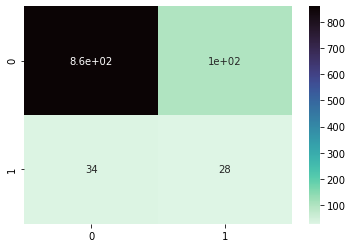

In [20]:
t0 = time()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_test,y_test) * 100, 2)
gnb_time=(round(time() - t0, 3))

from sklearn import metrics
print("Gaussian Naïve Bayes Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', gnb_time)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

Decision Tree Accuracy: 92.17221135029354 %
Training time 0.675


<AxesSubplot:>

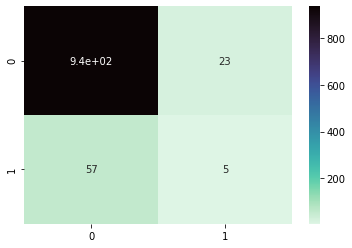

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
acc_dt = round(clf.score(X_test,y_test) * 100, 2)
dt_time=(round(time() - t0, 3))

from sklearn.metrics import accuracy_score 
print ("Decision Tree Accuracy:", metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', dt_time)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

kNN Accuracy: 93.44422700587084 %
Training time 1.184


<AxesSubplot:>

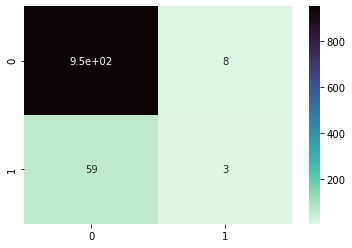

In [22]:
import sys, os
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test,y_test) * 100, 2)
knn_time=(round(time() - t0, 3))

from sklearn import metrics
print("kNN Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', knn_time)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

SVM Accuracy: 93.9334637964775 %
Training time 1.397


<AxesSubplot:>

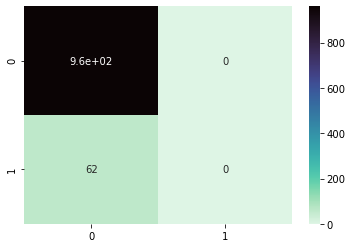

In [23]:
import warnings
warnings.filterwarnings('ignore')

import sys, os
from sklearn import svm
from sklearn.svm import SVC
clf = SVC(C=1, kernel='rbf')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc_svm = round(clf.score(X_test,y_test) * 100, 2)
svm_time=(round(time() - t0, 3))

print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")
print('Training time', svm_time)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

**Plotting all accuracies**

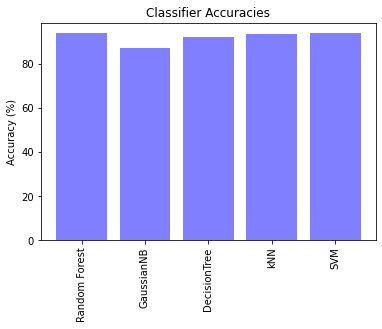

In [24]:
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_knn, acc_svm]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='blue')
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score_skf = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score_skf)
    acc_skf = round(score_skf * 100, 2)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score_skf))
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [3510  169], Accuracy: 0.956


Cross-Validation accuracy: 0.956 +/- 0.000
Fold:  2, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.955 +/- 0.001
Fold:  3, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.954 +/- 0.001
Fold:  4, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.954 +/- 0.001
Fold:  5, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.954 +/- 0.001
Fold:  6, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.954 +/- 0.001
Fold:  7, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.954 +/- 0.001
Fold:  8, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.954 +/- 0.001
Fold:  9, Training/Test Split Distribution: [3511  169],

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

import warnings
warnings.filterwarnings('ignore')

pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score_skf = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score_skf)
    acc_skf_knn = round(score_skf * 100, 2) # calculating accuracy for plot
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score_skf))
    print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [3510  169], Accuracy: 0.949


Cross-Validation accuracy: 0.949 +/- 0.000
Fold:  2, Training/Test Split Distribution: [3511  168], Accuracy: 0.954


Cross-Validation accuracy: 0.951 +/- 0.002
Fold:  3, Training/Test Split Distribution: [3511  168], Accuracy: 0.949


Cross-Validation accuracy: 0.950 +/- 0.002
Fold:  4, Training/Test Split Distribution: [3511  168], Accuracy: 0.939


Cross-Validation accuracy: 0.947 +/- 0.005
Fold:  5, Training/Test Split Distribution: [3511  168], Accuracy: 0.939


Cross-Validation accuracy: 0.946 +/- 0.006
Fold:  6, Training/Test Split Distribution: [3511  168], Accuracy: 0.951


Cross-Validation accuracy: 0.947 +/- 0.006
Fold:  7, Training/Test Split Distribution: [3511  168], Accuracy: 0.946


Cross-Validation accuracy: 0.947 +/- 0.005
Fold:  8, Training/Test Split Distribution: [3511  168], Accuracy: 0.949


Cross-Validation accuracy: 0.947 +/- 0.005
Fold:  9, Training/Test Split Distribution: [3511  169],

In [27]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
X = preprocessing.StandardScaler().fit(X).transform(X)
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.5,
                             random_state=0)
sss.get_n_splits(X, y)
scores = []

clf = RandomForestClassifier(n_estimators=40, max_depth=7)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred) * 100)
    acc_sss = np.mean(scores)
print(scores)
print('Avg Cross Validation accuracy for Shuffle split: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

[94.99021526418787, 95.06849315068493, 95.0293542074364, 95.10763209393346]
Avg Cross Validation accuracy for Shuffle split: 95.049 +/- 0.044


In [28]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

X = preprocessing.StandardScaler().fit(X).transform(X)
sss = StratifiedShuffleSplit(n_splits=4, test_size=0.5,
                             random_state=0)
sss.get_n_splits(X, y)
scores = []

clf = KNeighborsClassifier(n_neighbors=3)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred) * 100)
    acc_sss_knn = np.mean(scores)
print(scores)
print('Avg Cross Validation accuracy for Shuffle split: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

[94.09001956947162, 94.48140900195695, 94.01174168297456, 94.20743639921723]
Avg Cross Validation accuracy for Shuffle split: 94.198 +/- 0.178


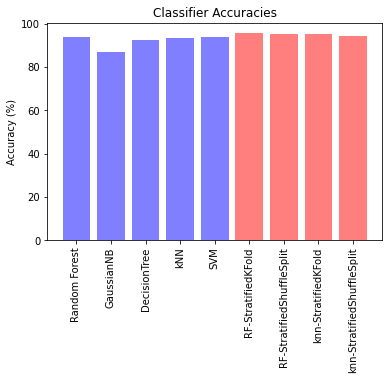

In [29]:
predictors_group = ('Random Forest', 'GaussianNB', 'DecisionTree','kNN','SVM', 'RF-StratifiedKFold','RF-StratifiedShuffleSplit','knn-StratifiedKFold','knn-StratifiedShuffleSplit')
x_pos = np.arange(len(predictors_group))
accuracies1 = [acc_rf, acc_gnb, acc_dt,acc_knn, acc_svm,acc_skf,acc_sss,acc_skf_knn,acc_sss_knn ]
colors = ['b','b','b','b','b','r','r','r','r']
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color=colors)
plt.xticks(x_pos, predictors_group, rotation='vertical')
plt.ylabel('Accuracy (%)')
plt.title('Classifier Accuracies')
plt.show()

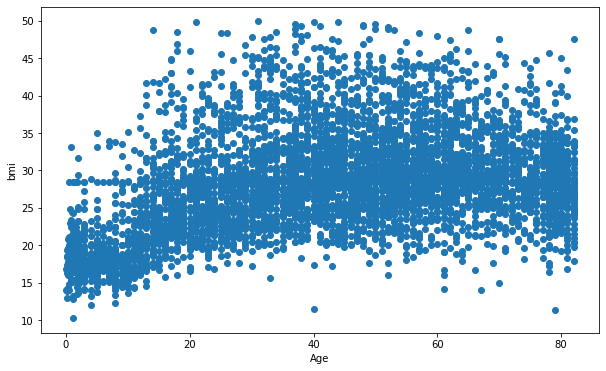

In [30]:
plt.figure(figsize=(10,6))
x = df_stroke.age
y =df_stroke.bmi
plt.xlabel('Age')
plt.ylabel('bmi')
plt.scatter(x,y)

In [31]:
df_stroke.drop(df_stroke[df_stroke.age < 20].index, inplace=True)
print (df_stroke.shape)

(4144, 11)


In [32]:
Xn = df_stroke.drop(['stroke'], axis=1)
yn = df_stroke['stroke']

from sklearn.model_selection import train_test_split
Xn_train, Xn_test , yn_train , yn_test = train_test_split(Xn,yn,test_size=0.2,random_state=42) # 80-20 split

print('Xn_train:', Xn_train.shape)
print('yn_train:', yn_train.shape)
print('Xn_test:', Xn_test.shape)
print('yn_test:', yn_test.shape)

Xn_train: (3315, 10)
yn_train: (3315,)
Xn_test: (829, 10)
yn_test: (829,)


Random Forest Classifier Accuracy: 92.2798552472859 %
Training time 0.344


<AxesSubplot:>

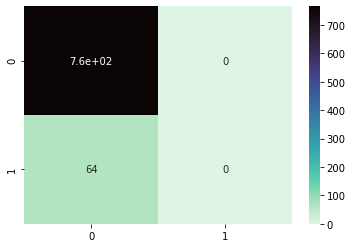

In [33]:
import warnings
warnings.filterwarnings('ignore')
t0 = time()

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(Xn_train, yn_train)

yn_pred = clf.predict(Xn_test)
acc_rf_n = round(clf.score(Xn_test,yn_test) * 100, 2)
rf_time_n=(round(time() - t0, 3))

from sklearn import metrics
print("Random Forest Classifier Accuracy:",metrics.accuracy_score(yn_test, yn_pred)*100,"%")
print('Training time', rf_time_n)

from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(yn_test, yn_pred))
sns.heatmap(cm, annot=True,cmap="mako_r")

In [34]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))
scores = cross_val_score(pipeline, X=Xn_train, y=yn_train, cv=10, n_jobs=1)
print('Cross Validation accuracy scores with updated df: %s' % scores)
print('updated Avg Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores with updated df: [0.94578313 0.94578313 0.94277108 0.94277108 0.94277108 0.94561934
 0.94561934 0.94561934 0.94561934 0.94561934]
updated Avg Cross Validation accuracy: 0.945 +/- 0.001
